In [1]:
from itertools import product
import numpy as np

In [2]:
def get_positions(N, rho, fill_type="random"):
    vol = N/rho
    l = vol**(1/3)
    box = np.array([l]*3)
    if fill_type == "random":
        x = random_fill(N, box)
    else:
        x = lattice_fill(N, box, fill_type)
    return x


def random_fill(N, box):
    x = np.zeros((N,3))
    i = 0
    def recursive_fill(i):
        xi = box*np.random.random(3)
        for j in range(i):
            xr = (x[j,:] - xi)
            xr = xr - np.array(xr/box, dtype=int)*box
            dr = np.sqrt(np.sum(xr**2))
            if (dr < 1.0):
                xi = recursive_fill(i)
        return xi
    while (i<N):
        xi = recursive_fill(i)
        x[i, :] = xi
        i += 1
    return x
    
def lattice_fill(N, box, lattice):
    rvecs = { 'cubic': np.array([[0.25, 0.25, 0.25]]),
              'bcc'  : np.array([[0.25, 0.25, 0.25],
                                 [0.75, 0.75, 0.75]]),
              'fcc'  : np.array([[0.25, 0.25, 0.25],
                                 [0.25, 0.75, 0.75],
                                 [0.75, 0.25, 0.75],
                                 [0.75, 0.75, 0.25]])}
    x = np.empty((N,3))
    if lattice =='cubic':
        n = int((N)**(1/3))
    elif lattice == 'fcc':
        n = int((N/4)**(1/3))+1
    elif lattice == 'bcc':
        n = int((N/2)**(1/3))+1
    else: 
        raise Exception("lattice type '{}' not recognised!".format(lattice)) 
    cell_size = box/n
    indices = product(range(n), repeat=3)
    for m, index in enumerate(indices):
        for r in rvecs[lattice]:
            x[m,:] = cell_size*(np.array(index) + r)
    if m == N:
        raise Exception("no. of particles error!")
    return x
    
def check_overlap(x, box):
    N = x.shape[0]
    overlap = False
    for i in range(N):
        for j in range(i+1,N):
            xr = x[i,:] - x[j,:]
            xr = xr - np.array(xr/box, dtype=int)*box
            dr = np.sqrt(np.sum(xr**2))
            if (dr < 1.0):
                print("Particles {i}, {j} overlap".format(i=i,j=j))
                overlap = True
    if overlap:
        return 0
    else:
        return 1



In [3]:
x = get_positions(216, 0.6, fill_type='random')

In [4]:
import matplotlib.pyplot as plt

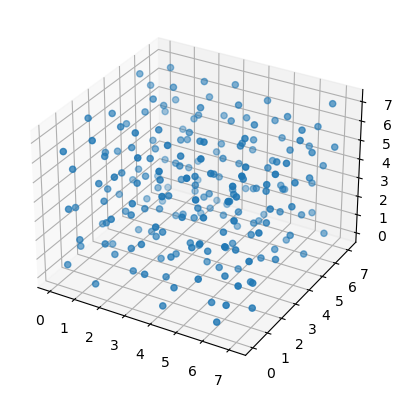

In [5]:
fig= plt.figure() 
ax = fig.add_subplot(projection='3d')
ax.scatter(x[:,0], x[:,1], x[:,2])

In [1]:
from initialise import get_velocities

In [2]:
v = get_velocities(216, 0.728)

(3,)


In [3]:
import numpy as np
np.sum(v)

-3.552713678800501e-14

In [5]:
np.float64

numpy.float64